# **Data Representation:**
-----

# Importing Necessery Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Data Loading:

In [2]:
img_size = (128, 128)
batch_size = 32

In [3]:
augmented_dir = r"C:\Users\LENOVO\alzheimer\AugmentedAlzheimerDataset"
original_dir = r"C:\Users\LENOVO\alzheimer\OriginalDataset"

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

Found 33984 files belonging to 4 classes.
Using 27188 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    augmented_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

Found 33984 files belonging to 4 classes.
Using 6796 files for validation.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    original_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

Found 6400 files belonging to 4 classes.


In [7]:
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


# Data Modeling:

In [8]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
print("Training the model...")
history = model.fit(
    train_ds,
    validation_data=val_ds, 
    epochs=10,
)

Training the model...
Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 949s 1s/step - accuracy: 0.6521 - loss: 0.7814 - val_accuracy: 0.7588 - val_loss: 0.5520
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 930s 1s/step - accuracy: 0.8396 - loss: 0.3867 - val_accuracy: 0.8531 - val_loss: 0.3614
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 1011s 1s/step - accuracy: 0.9076 - loss: 0.2316 - val_accuracy: 0.8705 - val_loss: 0.3518
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 983s 1s/step - accuracy: 0.9444 - loss: 0.1431 - val_accuracy: 0.8686 - val_loss: 0.4200
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 949s 1s/step - accuracy: 0.9651 - loss: 0.0960 - val_accuracy: 0.8617 - val_loss: 0.4582
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 906s 1s/step - accuracy: 0.9763 - loss: 0.0662 - val_accuracy: 0.8662 - val_loss: 0.5282
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 917s 1s/step - accuracy: 0.9823 - loss: 0.0509 - val_accuracy: 0.8743 - val_loss: 0.5308
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 928s 1s/step - accuracy: 0.9829 - 

In [11]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2%}")

200/200 ━━━━━━━━━━━━━━━━━━━━ 86s 417ms/step - accuracy: 0.9603 - loss: 0.1676 
Test Accuracy: 96.03%


# Model Prediction:

In [13]:
y_actual = []
y_pred = []

for images, labels in test_ds:
    y_actual.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

# Model Evaluation:

In [16]:
precision = precision_score(y_actual, y_pred, average='weighted')
recall = recall_score(y_actual, y_pred, average='weighted')
f1 = f1_score(y_actual, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")


Precision: 0.96
Recall:    0.96
F1-Score:  0.96


In [18]:
print("Classification Report:")
print(classification_report(y_actual, y_pred, target_names=test_ds.class_names))

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.99      1.00      0.99       896
ModerateDemented       0.98      1.00      0.99        64
     NonDemented       0.93      1.00      0.96      3200
VeryMildDemented       1.00      0.89      0.94      2240

        accuracy                           0.96      6400
       macro avg       0.98      0.97      0.97      6400
    weighted avg       0.96      0.96      0.96      6400



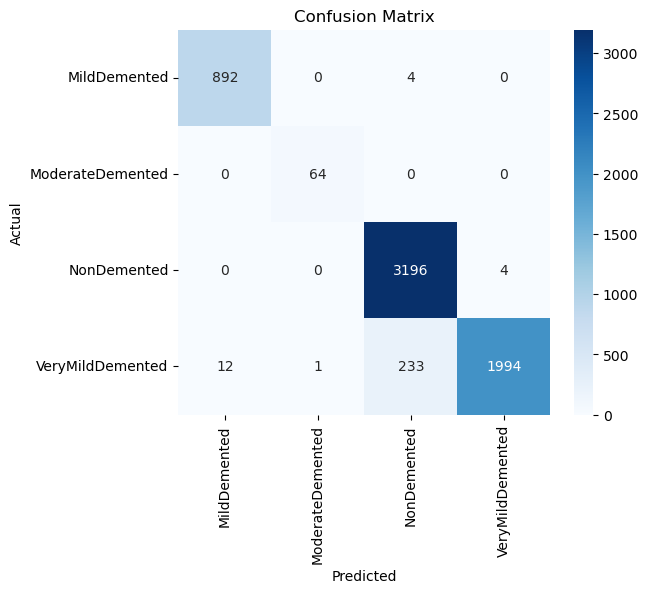

In [23]:
cm = confusion_matrix(y_actual, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Saving Model:

In [24]:
model.save('alzheimer_model.keras')

In [28]:
model = tf.keras.models.load_model('alzheimer_model.keras')